<a href="https://colab.research.google.com/github/Jair2472/Proyecto_Prediccion_MargenBruto/blob/main/EDA/EDA_General01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar datos (asumiendo que tenemos un CSV con los datos)
# Reemplaza 'datos_blancos.csv' con tu archivo real
try:
    df = pd.read_csv('/content/dataset_corregido.csv', encoding='latin1')
    print("Datos cargados correctamente. Mostrando primeras filas:")
    print(df.head())

except FileNotFoundError:
    print("Error: Archivo no encontrado. Por favor verifica el nombre y ubicación del archivo.")
    exit()

# Verificar estructura de datos
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Datos cargados correctamente. Mostrando primeras filas:
   FiscalYear  Period  DayOfPeriod        Date  Depto    NameDept  \
0        2019       1            1  2018-10-29    123  CARNICERIA   
1        2019       1            2  2018-10-30    123  CARNICERIA   
2        2019       1            3  2018-10-31    123  CARNICERIA   
3        2019       1            4  2018-11-01    123  CARNICERIA   
4        2019       1            5  2018-11-02    123  CARNICERIA   

    VentasAcum  CostosAcum  IngresosAcum  MargenFinal%  DiaSemana  FinDeSemana  
0   25582.8444   6224.7430     -178.1956      0.200765          0            0  
1   52294.8960  12551.4116     -211.5061      0.200765          1            0  
2   75989.9811  17472.1710     -445.8216      0.200765          2            0  
3  101996.7774  23246.2604     -820.0995      0.200765          3            0  
4  130852.2679  29349.9229    -1185.0055      0.200765          4            0  

Información del dataset:
<class 'pandas.co

In [ ]:
df.head()


,FiscalYear,Period,DayOfPeriod,Date,Depto,NameDept,VentasAcum,CostosAcum,IngresosAcum,MargenFinal%,DiaSemana,FinDeSemana
0,2019,1,1,2018-10-29,123,CARNICERIA,25582.8444,6224.7430,-178.1956,0.200765,0,0
1,2019,1,2,2018-10-30,123,CARNICERIA,52294.8960,12551.4116,-211.5061,0.200765,1,0
2,2019,1,3,2018-10-31,123,CARNICERIA,75989.9811,17472.1710,-445.8216,0.200765,2,0
3,2019,1,4,2018-11-01,123,CARNICERIA,101996.7774,23246.2604,-820.0995,0.200765,3,0
4,2019,1,5,2018-11-02,123,CARNICERIA,130852.2679,29349.9229,-1185.0055,0.200765,4,0


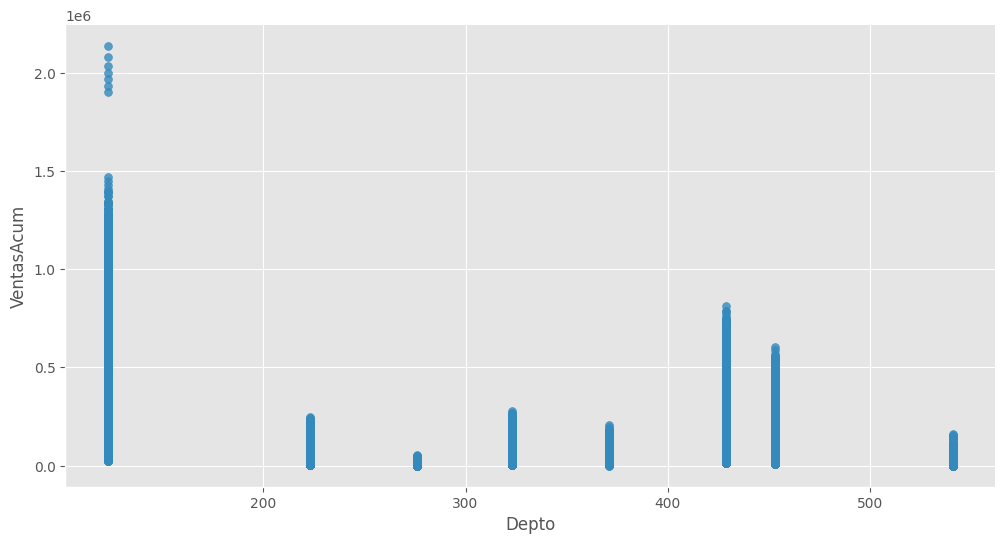

In [ ]:
# @title Depto vs VentasAcum

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Depto', y='VentasAcum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

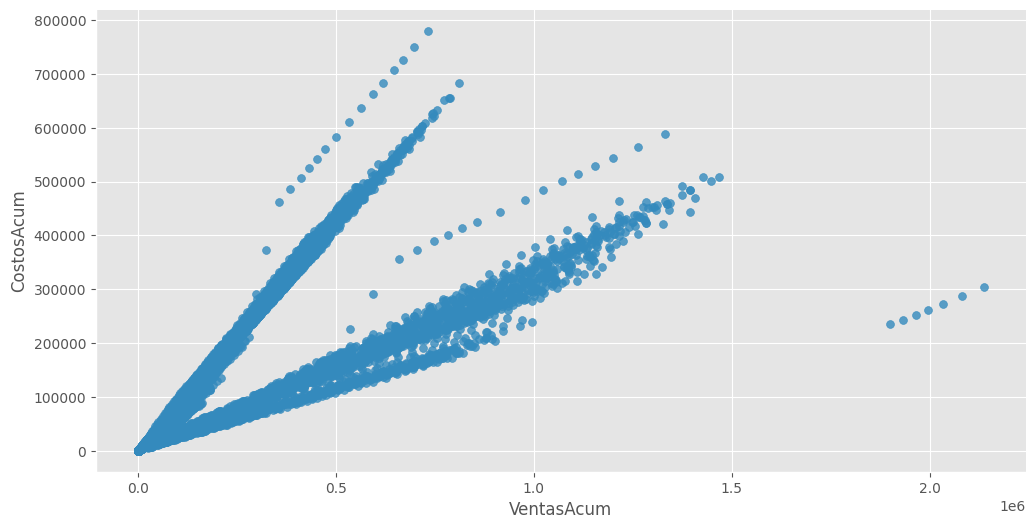

In [ ]:
# @title VentasAcum vs CostosAcum

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='VentasAcum', y='CostosAcum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

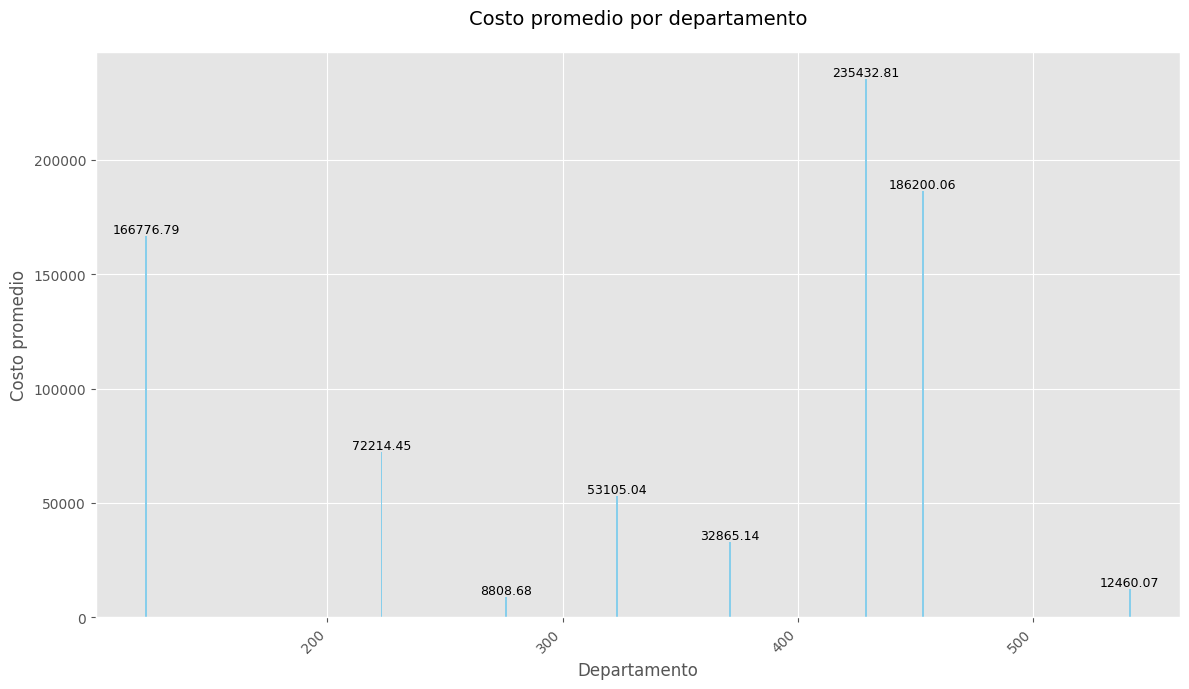


Resultados:
Depto
276      8808.680743
541     12460.065789
371     32865.143824
323     53105.037116
223     72214.453572
123    166776.790878
453    186200.063476
429    235432.810411


In [ ]:
import matplotlib.pyplot as plt

def mejor_costo_por_dpto_mejorada():
    """Versión con más controles y mensajes de error"""
    try:
        # Verificar columnas
        required_cols = {'CostosAcum', 'Depto'}
        if not required_cols.issubset(df.columns):
            missing = required_cols - set(df.columns)
            raise ValueError(f"Columnas faltantes: {missing}")

        # Calcular costos
        costo_dpto = df.groupby('Depto')['CostosAcum'].mean().sort_values()

        # Configurar gráfico
        fig, ax = plt.subplots(figsize=(12, 7))
        bars = ax.bar(costo_dpto.index, costo_dpto.values, color='skyblue')

        # Personalizar
        ax.set_title('Costo promedio por departamento', pad=20, fontsize=14)
        ax.set_ylabel('Costo promedio', fontsize=12)
        ax.set_xlabel('Departamento', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        # Mostrar datos
        print("\nResultados:")
        print(costo_dpto.to_string())

    except Exception as e:
        print(f"Error: {str(e)}")
        if 'df' not in locals():
            print("DataFrame 'df' no está definido")
        elif not isinstance(df, pd.DataFrame):
            print("'df' no es un DataFrame válido")

# Configuración para Jupyter (si es necesario)
%matplotlib inline

# Ejecutar
mejor_costo_por_dpto_mejorada()

In [ ]:
# Análisis 2: ¿Cuándo venden menos?
def cuando_venden_menos():
    """Identifica los periodos de menores ventas"""
    if 'fecha' in df.columns and 'ventas' in df.columns:
        df['fecha'] = pd.to_datetime(df['fecha'])
        ventas_por_mes = df.groupby(df['fecha'].dt.to_period('M'))['ventas'].sum()

        plt.figure(figsize=(12, 6))
        ventas_por_mes.plot(kind='line', marker='o', color='salmon')
        plt.title('Ventas mensuales')
        plt.ylabel('Total ventas')
        plt.xlabel('Mes')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        mes_min_ventas = ventas_por_mes.idxmin()
        print(f"\nEl mes con menores ventas fue: {mes_min_ventas}")
    else:
        print("Columnas 'fecha' o 'ventas' no encontradas en los datos.")

In [ ]:
# Análisis 3: ¿Qué departamentos venden más?
def dptos_mas_vendidos():
    """Identifica los departamentos con mayores ventas"""
    if 'departamento' in df.columns and 'ventas' in df.columns:
        ventas_dpto = df.groupby('departamento')['ventas'].sum().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        ventas_dpto.plot(kind='bar', color='lightgreen')
        plt.title('Ventas totales por departamento')
        plt.ylabel('Ventas totales')
        plt.xlabel('Departamento')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print("\nDepartamentos ordenados por ventas (de mayor a menor):")
        print(ventas_dpto)
    else:
        print("Columnas 'departamento' o 'ventas' no encontradas en los datos.")

In [ ]:
# Análisis 3: ¿Qué departamentos venden más?
def dptos_mas_vendidos():
    """Identifica los departamentos con mayores ventas"""
    if 'departamento' in df.columns and 'ventas' in df.columns:
        ventas_dpto = df.groupby('departamento')['ventas'].sum().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        ventas_dpto.plot(kind='bar', color='lightgreen')
        plt.title('Ventas totales por departamento')
        plt.ylabel('Ventas totales')
        plt.xlabel('Departamento')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print("\nDepartamentos ordenados por ventas (de mayor a menor):")
        print(ventas_dpto)
    else:
        print("Columnas 'departamento' o 'ventas' no encontradas en los datos.")

In [ ]:
# Análisis 4: Departamento por ingresos
def dpto_por_ingresos():
  """Analiza los ingresos por departamento"""
  if 'departamento' in df.columns and 'ingresos' in df.columns:
      ingresos_dpto = df.groupby('departamento')['ingresos'].sum().sort_values(ascending=False)

      plt.figure(figsize=(10, 6))
      ingresos_dpto.plot(kind='bar', color='gold')
      plt.title('Ingresos totales por departamento')
      plt.ylabel('Ingresos totales')
      plt.xlabel('Departamento')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()

      print("\nDepartamentos ordenados por ingresos (de mayor a menor):")
      print(ingresos_dpto)
  else:
      print("Columnas 'departamento' o 'ingresos' no encontradas en los datos.")

In [ ]:
# Análisis 5: Departamento por costos
def dpto_por_costos():
    """Analiza los costos por departamento"""
    if 'departamento' in df.columns and 'costo' in df.columns:
        costos_dpto = df.groupby('departamento')['costo'].sum().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        costos_dpto.plot(kind='bar', color='lightcoral')
        plt.title('Costos totales por departamento')
        plt.ylabel('Costos totales')
        plt.xlabel('Departamento')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print("\nDepartamentos ordenados por costos (de mayor a menor):")
        print(costos_dpto)
    else:
        print("Columnas 'departamento' o 'costo' no encontradas en los datos.")

In [ ]:
# Análisis 6: Departamento por ventas
def dpto_por_ventas():
    """Analiza las ventas por departamento (similar a dptos_mas_vendidos pero con más detalle)"""
    if 'departamento' in df.columns and 'ventas' in df.columns:
        ventas_stats = df.groupby('departamento')['ventas'].agg(['sum', 'mean', 'count'])
        ventas_stats = ventas_stats.sort_values('sum', ascending=False)

        print("\nEstadísticas de ventas por departamento:")
        print(ventas_stats)

        # Gráfico de ventas totales
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        ventas_stats['sum'].plot(kind='bar', color='lightseagreen')
        plt.title('Ventas totales por departamento')
        plt.ylabel('Ventas totales')
        plt.xticks(rotation=45)

        # Gráfico de ventas promedio
        plt.subplot(1, 2, 2)
        ventas_stats['mean'].plot(kind='bar', color='mediumpurple')
        plt.title('Ventas promedio por departamento')
        plt.ylabel('Ventas promedio')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
    else:
        print("Columnas 'departamento' o 'ventas' no encontradas en los datos.")

In [ ]:
# Ejecutar todos los análisis
print("\n=== Análisis 1: Mejor costo por departamento ===")
mejor_costo_por_dpto()

print("\n=== Análisis 2: ¿Cuándo venden menos? ===")
cuando_venden_menos()

print("\n=== Análisis 3: ¿Qué departamentos venden más? ===")
dptos_mas_vendidos()

print("\n=== Análisis 4: Departamento por ingresos ===")
dpto_por_ingresos()

print("\n=== Análisis 5: Departamento por costos ===")
dpto_por_costos()

print("\n=== Análisis 6: Departamento por ventas ===")
dpto_por_ventas()


=== Análisis 1: Mejor costo por departamento ===
Columnas 'costo' o 'departamento' no encontradas en los datos.

=== Análisis 2: ¿Cuándo venden menos? ===
Columnas 'fecha' o 'ventas' no encontradas en los datos.

=== Análisis 3: ¿Qué departamentos venden más? ===
Columnas 'departamento' o 'ventas' no encontradas en los datos.

=== Análisis 4: Departamento por ingresos ===
Columnas 'departamento' o 'ingresos' no encontradas en los datos.

=== Análisis 5: Departamento por costos ===
Columnas 'departamento' o 'costo' no encontradas en los datos.

=== Análisis 6: Departamento por ventas ===
Columnas 'departamento' o 'ventas' no encontradas en los datos.
